In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
snp      = yf.download('^GSPC', progress=False)['Adj Close'].loc['1990-01-02':]
snp_skew = yf.download('^SKEW', progress=False)['Adj Close']
vix      = yf.download('^VIX', progress=False)['Adj Close']
vix_9d   = yf.download('^VIX9D', progress=False)['Adj Close']
vix_3m   = yf.download('^VIX3M', progress=False)['Adj Close']
vix_6m   = yf.download('^VIX6M', progress=False)['Adj Close']
vix_1y   = yf.download('^VIX1Y', progress=False)['Adj Close']

In [3]:
df = pd.DataFrame(data=[snp, snp_skew, vix], index=['snp', 'snp_skew', 'vix']).T

In [75]:
# df_vix = pd.DataFrame(data=[vix, vix_9d, vix_3m, vix_6m, vix_1y], index=['vix', 'vix_9d', 'vix_3m', 'vix_6m', 'vix_1y']).T

In [5]:
import talib as tb

In [29]:
np.log(vix[1:].values) - np.log(vix[:-1].values)

array([ 0.05363977,  0.05507935,  0.04526587, ..., -0.02189303,
       -0.03009254, -0.00817996])

In [28]:
np.log(vix.pct_change())

/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Date
1990-01-02         NaN
1990-01-03   -2.898525
1990-01-04   -2.871314
1990-01-05   -3.072484
1990-01-08   -4.898340
                ...   
2022-11-01         NaN
2022-11-02   -6.246471
2022-11-03         NaN
2022-11-04         NaN
2022-11-07         NaN
Name: Adj Close, Length: 8278, dtype: float64

In [18]:
vix_10a = tb.SMA(vix, timeperiod=10)
vix_10a_log = np.log(vix_10a.shift(1)) - np.log(vix_10a.shift())

Date
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-08         NaN
                ...   
2022-11-01    3.335236
2022-11-02    3.317635
2022-11-03    3.300530
2022-11-04    3.281400
2022-11-07    3.260517
Length: 8278, dtype: float64

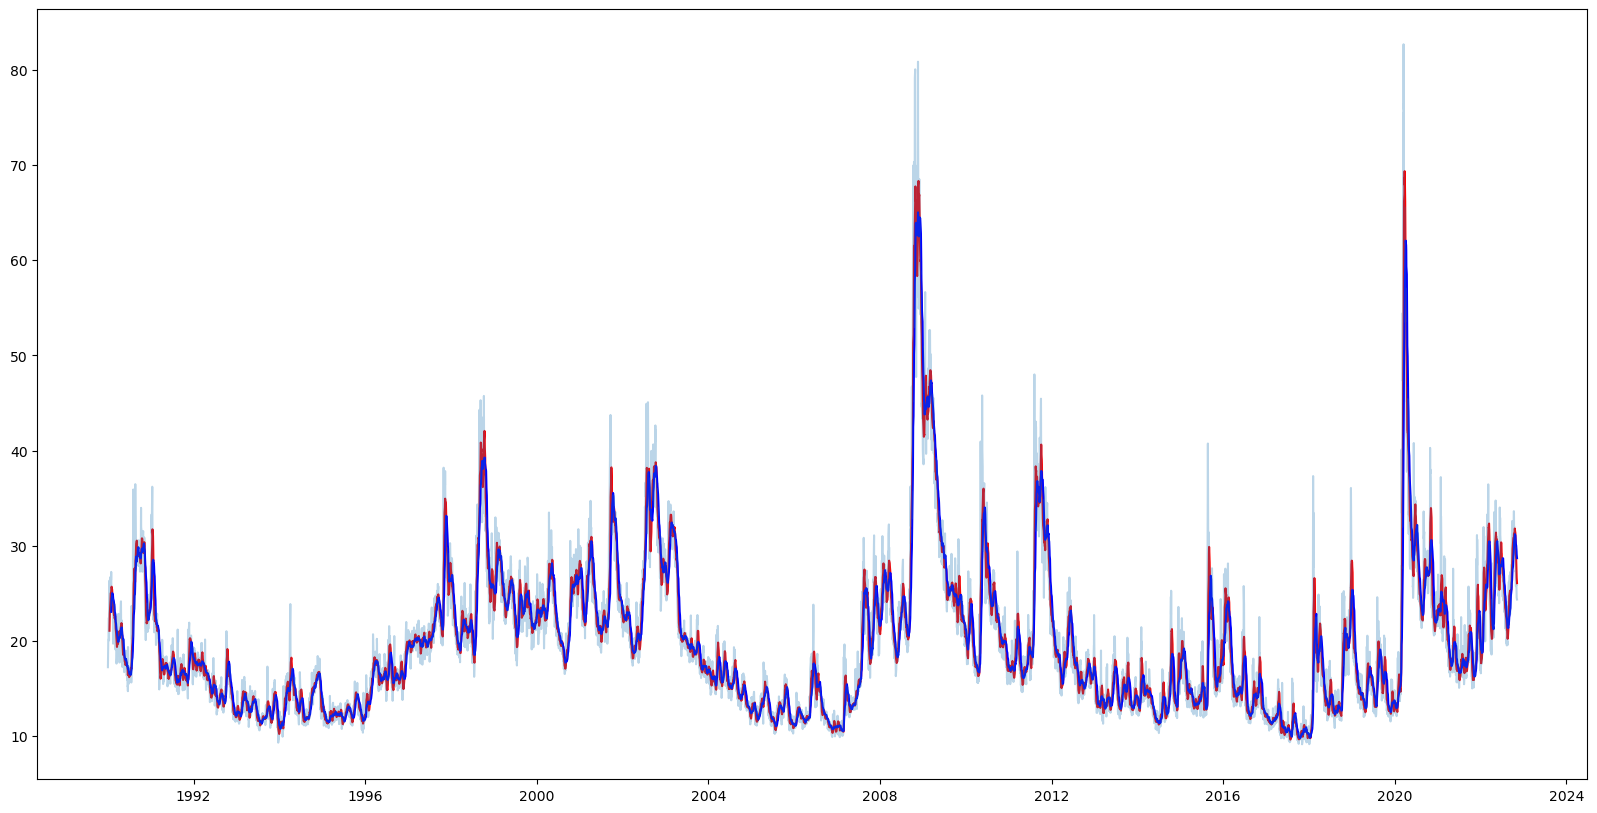

In [32]:
plt.figure(figsize=(20, 10), facecolor='w')
plt.plot(tb.SMA(vix, timeperiod=10), c='r')
plt.plot(tb.SMA(vix, timeperiod=20), c='b')
plt.plot(vix, alpha=0.3)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(df), columns=['snp', 'snp_skew', 'vix'], index=df.index)

,snp,snp_skew,vix
Date,,,
1990-01-02,-1.147706,0.563725,-0.301247
1990-01-03,-1.148649,0.266823,-0.182631
1990-01-04,-1.151783,0.189090,-0.054026
1990-01-05,-1.155301,0.043337,0.057099
1990-01-08,-1.153689,0.351036,0.075828
...,...,...,...
2022-10-31,2.413651,-0.961809,0.777536
2022-11-01,2.397549,-1.017950,0.768796
2022-11-02,2.299792,-0.958570,0.775039


<AxesSubplot:xlabel='Date'>

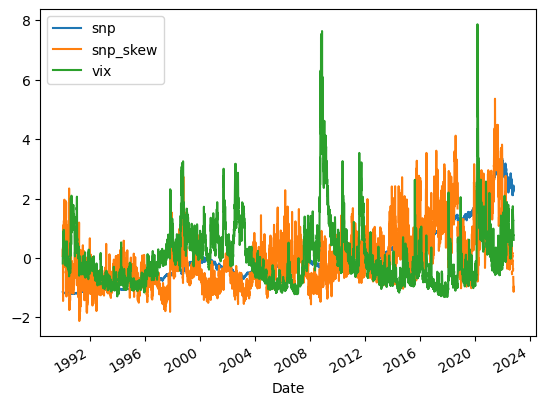

In [33]:
pd.DataFrame(scaler.fit_transform(df), columns=['snp', 'snp_skew', 'vix'], index=df.index).plot()

In [42]:
df_monthly = df.resample('m').mean()

In [46]:
arr = scaler.fit_transform(df_monthly[['snp_skew', 'vix']])

In [60]:
set = (arr[:,0] - arr[:,1])
set.shape

(395,)

In [68]:
y = df_monthly['snp'].pct_change().dropna(); x = set[:-1]
y.shape, x.shape

((394,), (394,))

In [72]:
from statsmodels.api import OLS

ols = OLS(endog=y, exog=x)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    snp   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.2884
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                       0.592
Time:                        13:52:49   Log-Likelihood:                          746.28
No. Observations:                 394   AIC:                                     -1491.
Df Residuals:                     393   BIC:                                     -1487.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.001      0.537      0.592      -0.002       0.003
==============================================================================
Omnibus:                      119.454   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.572
Skew:                          -1.203   Prob(JB):                    1.05e-130
Kurtosis:                       8.538   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""